In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [2]:
learning_rate = 0.01
training_steps = 1000
display_step = 50


In [3]:
X = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
Y = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

In [4]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

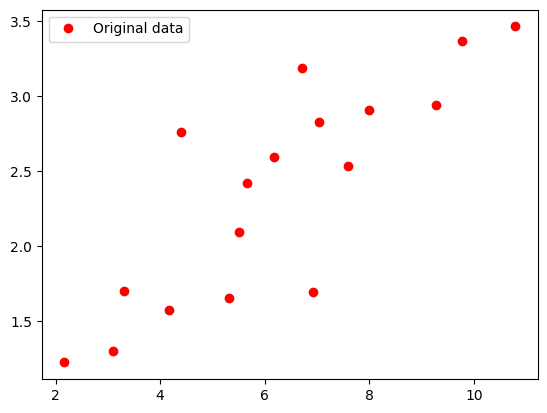

In [5]:
plt.plot(X, Y, 'ro', label = 'Original data')
plt.legend()
plt.show()

In [6]:
w = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)

In [7]:
def model(x):
    return x * w + b

In [8]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [9]:
preds = model(inputs)
preds

tensor([ 0.3031,  0.2577,  0.2123,  0.1624,  0.1533,  0.2673,  0.0358,  0.1842,
         0.1261,  0.3498,  0.1487, -0.0059,  0.2200,  0.1093,  0.2060,  0.0568,
         0.3113], dtype=torch.float64, grad_fn=<AddBackward0>)

In [10]:
loss = mse(preds, targets)
loss

tensor(5.3939, dtype=torch.float64, grad_fn=<DivBackward0>)

In [11]:
loss.backward()

In [12]:
with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()

In [13]:
preds = model(inputs)
loss = mse(preds, targets)
loss

tensor(0.2148, dtype=torch.float64, grad_fn=<DivBackward0>)

In [25]:
losses = []

for i in range(training_steps):
    preds = model(inputs)
    loss = mse(preds, targets)
    losses.append(loss.detach())
    loss.backward()
    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

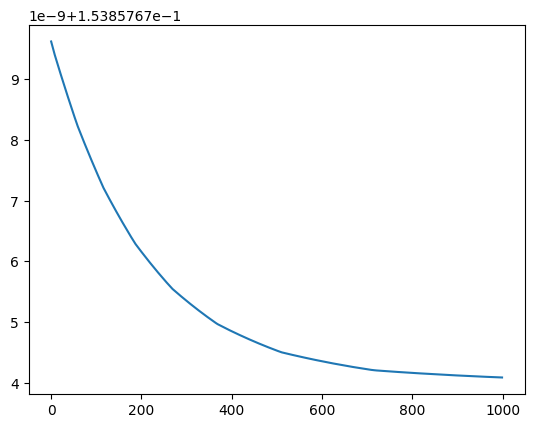

In [29]:
plt.plot(np.arange(len(losses)), losses, label = 'Loss line')
plt.show()

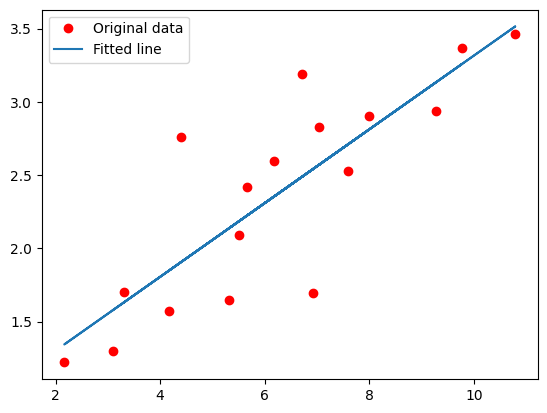

In [34]:
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, (w * inputs + b).detach(), label = 'Fitted line')
plt.legend()
plt.show()
